#**ReLU: 렐루 함수**

은닉층에서의 활성화 함수는 시그모이드(sigmoid)를 사용했고,   
출력층에서는 이진 분류의 경우에 시그모이드,   
다중 분류에는 소프트맥스,   
합성곱층에는 '렐루(ReLU)'를 사용한다.

렐루 함수는 x가 0보다 작으면 y가 0이 되고, 0보다 크면 y=x가 된다.

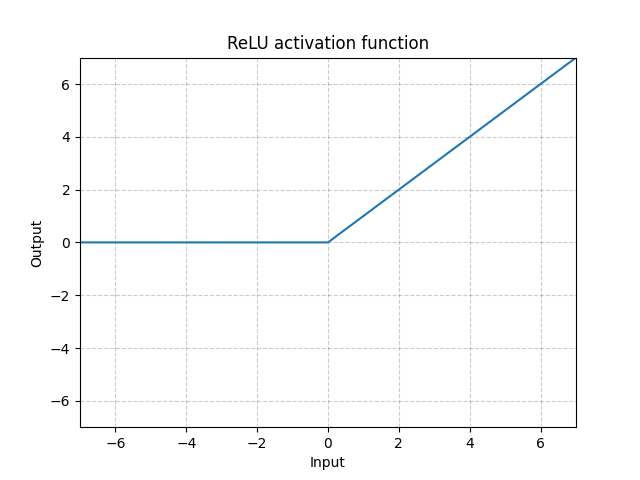

#**ReLU 함수 구현하기**

렐루함수는 넘파이의 maximum() 메서드를 사용해 간단하게 구현할 수 있다.
이 메서드는 두 파라미터 값 중 큰 값을 반환한다.

In [4]:
import numpy as np
import tensorflow as tf

In [2]:
def relu(x):
  return np.maximum(x, 0)

In [3]:
x = np.array([-1, 2, -3, 4, -5])
relu(x)

array([0, 2, 0, 4, 0])

텐서플로에서 제공하는 렐루 함수는 relu()이다.   
텐서플로의 렐루함수는 Tensor 객체를 반환하므로 화면에 출력하기 위해서는 넘파이로 변환해야 한다.

In [5]:
r_out = tf.nn.relu(x)
r_out.numpy()

array([0, 2, 0, 4, 0])

#**합성곱 신경망의 구조**

합성곱 신경망은 이미지의 2차원 형태를 입력 그대로 사용하기 때문에 앞에서 진행한 다중 분류 문제처럼 한 줄로 펼칠 필요는 없다.   

한 가지 고려할 점은, '이미지 채널'이 존재한다는 것이다.   
'채널'은 이미지의 픽셀이 가진 색상을 표현하기 위한 정보이다.   
<br>

이미지의 모든 채널에 합성곱이 한 번에 적용되어야 하므로 커널의 마지막 차원은 입력 채널의 개수와 동일해야 한다.   
커널의 크기는 보통 3x3, 5x5를 사용한다.   
예를들어 입력 이미지가 4x4x10(10개의 채널을 가진 4x4 이미지)라면,   
커널도 3x3x10이 되어야 한다.   

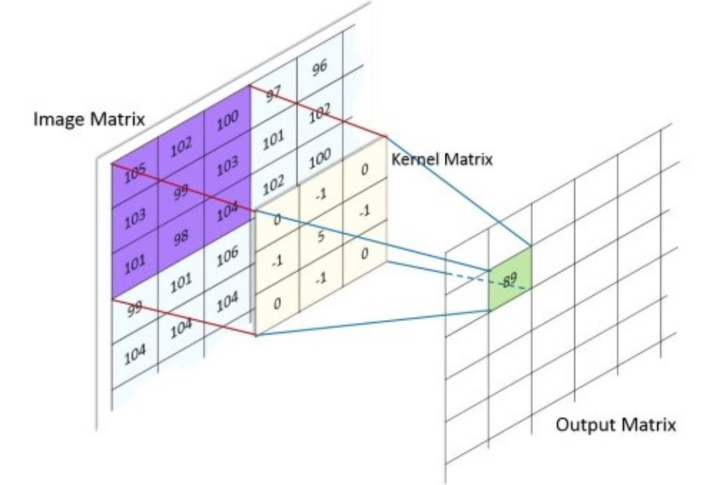

합성곱층을 통해 만들어진 특성 맵은 렐루 함수를 통과하고 풀링을 적용하게 된다.   

커널 5개와 합성곱을 통해 2x2x5 특성 맵이 만들어졌다면,   
렐루 함수를 통과한 특성 맵은 풀링을 통해 1x1x5 크기의 특성 맵으로 크기가 줄어든다.

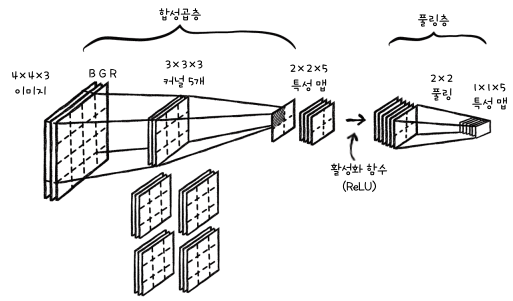

이렇게 합성곱층과 풀링층을 모두 거친 특성 맵은 완전연결층에 입력으로 주입된다.   
완전연결층의 입력으로 들어간 1x1x5의 특성 맵은 소프트맥스 함수를 거쳐 최종 출력을 한다.

##**합성곱 신경망의 전체 구조**

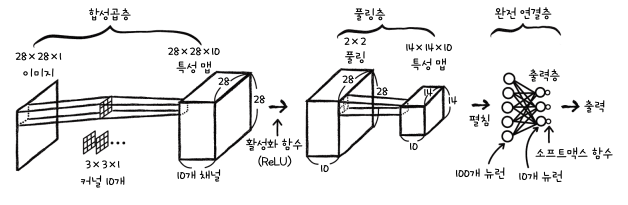